In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


# Image Reading

In [2]:
img1=cv2.imread('/media/tumpa/Linux/Personal/Image Processing/image database/DIP3E_Original_Images_CH03/Fig0333(a)(test_pattern_blurring_orig).tif',0)

In [3]:
img1.shape

(500, 500)

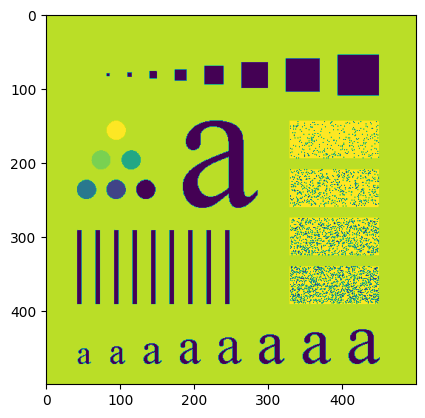

In [4]:
plt.imshow(img1)

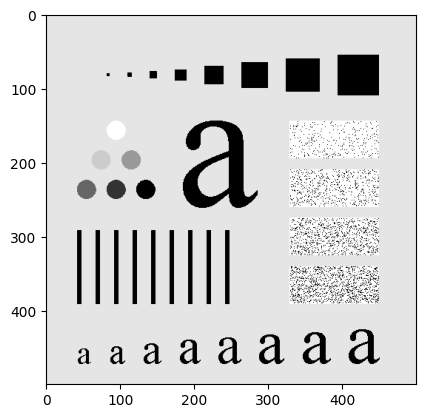

In [5]:
img1_rgb=cv2.cvtColor(img1,cv2.COLOR_BGR2RGB)
plt.imshow(img1_rgb)

In [6]:
img3=img1

In [7]:
img3

array([[229, 229, 229, ..., 229, 255, 255],
       [229, 229, 229, ..., 229, 229, 229],
       [229, 229, 229, ..., 229, 229, 229],
       ...,
       [229, 229, 229, ..., 229, 229, 229],
       [229, 229, 229, ..., 229, 229, 229],
       [229, 229, 229, ..., 229, 229, 255]], dtype=uint8)

In [8]:
img3[200:203,100:103]

array([[229, 229, 229],
       [229, 229, 229],
       [229, 229, 229]], dtype=uint8)

# Method for applying filter 'filter' on the image 'img'

In [9]:
def spatial_filtering(img,filter):
    r1,c1=img.shape
    print(img[100,100])
    img2=np.array(img1)
    r2,c2=filter.shape
    l=r2//2
    s=r2*c2
    #print(s)
    print(l)
    for i in range(l,r1-l):
        for j in range(l,c1-l):
            #print(i,j)
            #print(img[i-l:i+l+1,j-l:j+l+1])
            p=np.average(np.multiply(filter,img[i-l:i+l+1,j-l:j+l+1]))
            #print(p)
            img2[i,j]=p
    img2=img2.astype('uint8')
    return img2
            

# Results of lowpass filtering with box kernels of sizes 3 × 3 ,

In [10]:
kernel=np.ones((3,3),np.float32)

In [11]:
img2=spatial_filtering(img3,kernel)

229
1


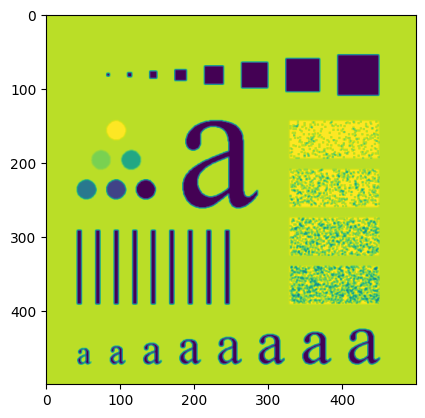

In [12]:
plt.imshow(img2)

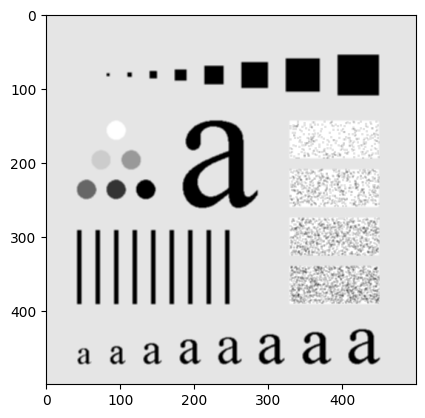

In [13]:
img2_rgb=cv2.cvtColor(img2,cv2.COLOR_BGR2RGB)
plt.imshow(img2_rgb)

# Results of lowpass filtering with box kernels of sizes 5 × 5

229
2


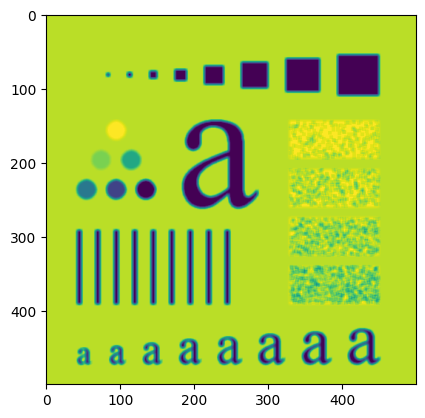

In [17]:
kernel=np.ones((5,5),np.float32)
img2=spatial_filtering(img3,kernel)
plt.imshow(img2)

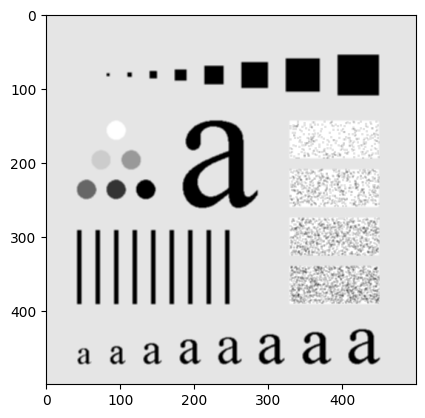

In [14]:
img2_rgb=cv2.cvtColor(img2,cv2.COLOR_BGR2RGB)
plt.imshow(img2_rgb)

# Results of lowpass filtering with box kernels of sizes 11 × 11

229
5


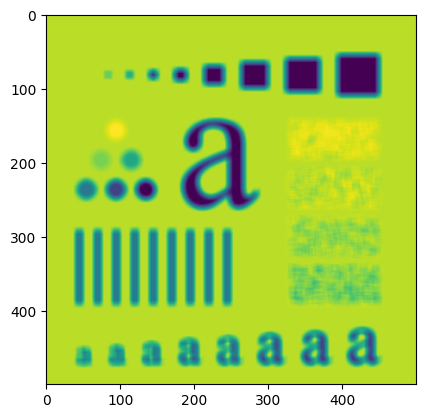

In [18]:
kernel=np.ones((11,11),np.float32)
img2=spatial_filtering(img3,kernel)
plt.imshow(img2)

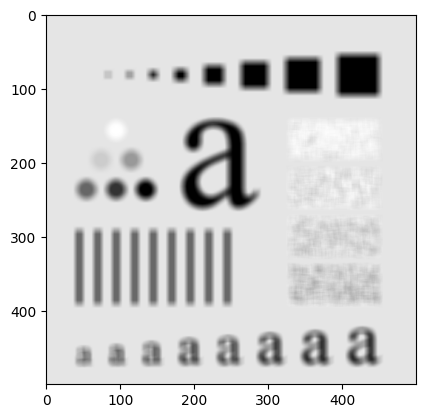

In [19]:
img2_rgb=cv2.cvtColor(img2,cv2.COLOR_BGR2RGB)
plt.imshow(img2_rgb)

# Image thresholding
For every pixel, the same threshold value is applied. If the pixel value is smaller than the threshold, it is set to 0, otherwise it is set to a maximum value. 

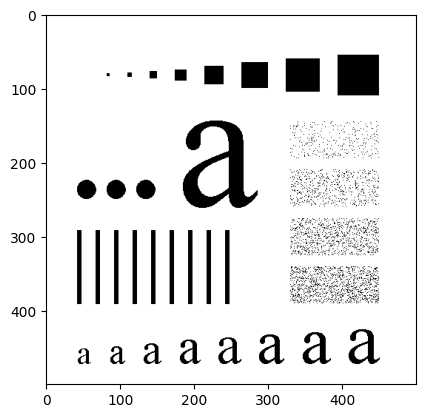

In [20]:
(T, thresh) = cv2.threshold(img1, 150, 255, cv2.THRESH_BINARY) 
plt.imshow(thresh, cmap='gray') 
plt.show() 

# Apply Lowpass filtering with a Gaussian kernel.

In [21]:
gs_filter=[[0.3679,0.6065,0.3679],[0.6065,1.0,0.6065],[0.3679,0.6065,0.3679]]
gauss_filter=np.array(gs_filter)

229
1


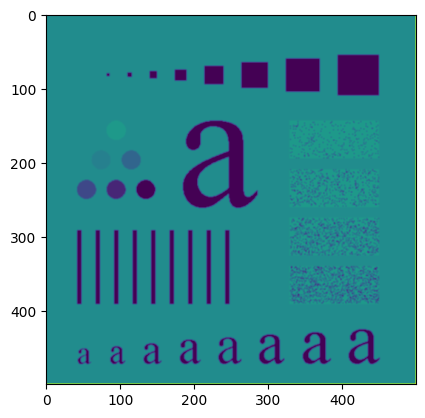

In [22]:
img2=spatial_filtering(img3,gauss_filter)
plt.imshow(img2)

# Apply Order Statatistic filter

# Median Filter

In [33]:
def spatial_order_statistic_filtering_median(img,filter_shape=3):
    r1,c1=img.shape
    print(img[100,100])
    img2=np.array(img1)
    r2,c2=filter_shape,filter_shape
    l=r2//2
    s=r2*c2
    #print(s)
    print(l)
    for i in range(l,r1-l):
        for j in range(l,c1-l):
            #print(i,j)
            #print(img[i-l:i+l+1,j-l:j+l+1])
            p=np.median(img[i-l:i+l+1,j-l:j+l+1])
            #print(p)
            img2[i,j]=p
    img2=img2.astype('uint8')
    return img2

229
1


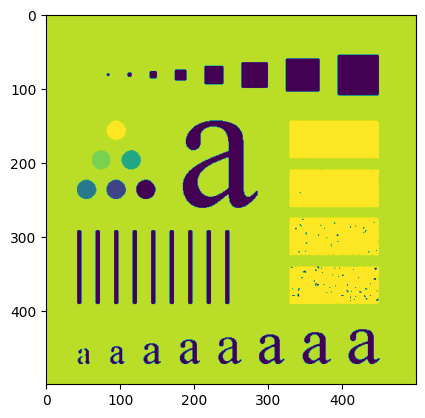

In [34]:
img2=spatial_order_statistic_filtering_median(img3,3)
plt.imshow(img2)

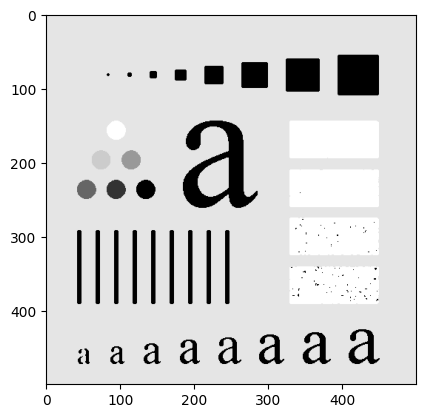

In [35]:
img2_rgb=cv2.cvtColor(img2,cv2.COLOR_BGR2RGB)
plt.imshow(img2_rgb)

# Max Filter

In [36]:
def spatial_order_statistic_filtering_max(img,filter_shape=3):
    r1,c1=img.shape
    print(img[100,100])
    img2=np.array(img1)
    r2,c2=filter_shape,filter_shape
    l=r2//2
    s=r2*c2
    #print(s)
    print(l)
    for i in range(l,r1-l):
        for j in range(l,c1-l):
            #print(i,j)
            #print(img[i-l:i+l+1,j-l:j+l+1])
            p=np.max(img[i-l:i+l+1,j-l:j+l+1])
            #print(p)
            img2[i,j]=p
    img2=img2.astype('uint8')
    return img2

229
1


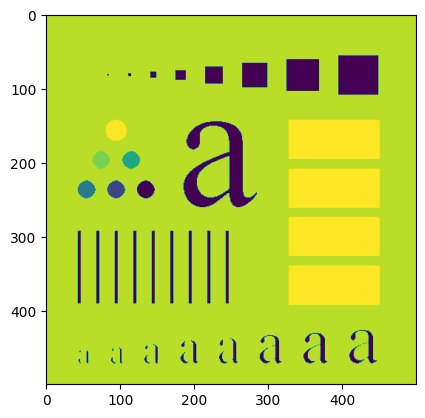

In [37]:
img2=spatial_order_statistic_filtering_max(img3,3)
plt.imshow(img2)

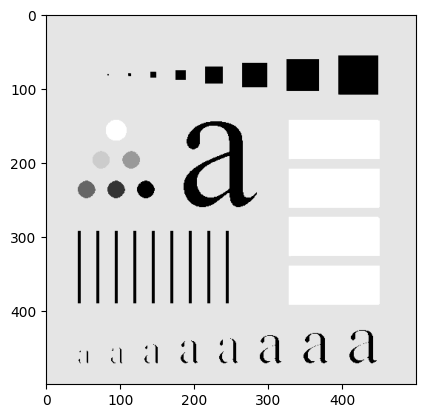

In [38]:
img2_rgb=cv2.cvtColor(img2,cv2.COLOR_BGR2RGB)
plt.imshow(img2_rgb)